### 1. 주성분분석

- 1) 주성분분석(Principal Component Analysis, PCA)
- 2) 차원의 저주(curse of dimensionality): 데이터의 차원이 늘어나면 최적의 모형을 만들기 위한 데이터와 계산 비용과 같은 리소스가 기하급수적으로 증가하는 현상
- 3) 차원 축소
    - 예를 들어 이미지의 경우 테두리 쪽의 흰색 바탕 같은 경우는 제거해도 분류하는데 큰 무리가 없음, 인접한 두 픽셀을 하나로 합쳐도(예를 들면 두 픽셀의 평균값) 큰 문제가 없음
    - bmp와 jpg : jpg는 압축된 이미지이기에 약간의 정보 손실은 있음
    - 정보의 손실을 최소화하는 선에 차원을 축소할 수 있다면 시스템의 리소스를 절약하고 학습 시간 단축 및 데이터 시각화에 유리함

4) 주성분 분석의 원리

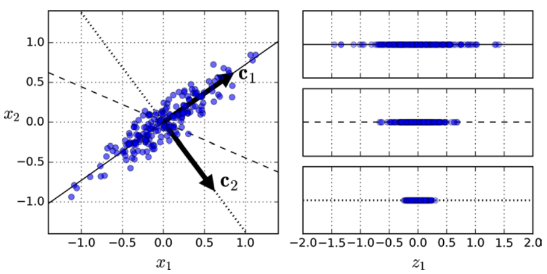

In [1]:
from IPython.display import Image
Image('Data/png/727_1.png')

↑ 위의 3차원의 데이터를 2차원으로 줄이고 싶을 경우, 축을 새롭게 그려서 데이터 관찰
    - 오른쪽 그래프는 높이(분산) ... 분산이 클수록 정보량이 많음
    - 정보량의 손실을 가장 적게 하려면 실선(c1)을 선택해야 함: 분산량이 제일 적은 것을 버리는 게 유리
    - 2차원 그래프로 표현하기 위해 c1과 직교하는 점선(c2) 축을 선택

    - i번째 축을 정의하는 벡터 반위를 i번째 주성분(Principal Component, PC)이라고 함

    - 계산량(학습시간) vs 정보손실 중에 선택

In [2]:
import numpy as np
from sklearn.decomposition import PCA

# 테스트할 데이터
X=np.array([[1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,4,5,6],
            [1,2,1,1,1,1,1,1,1,1,3,4,3,3,3,4,5,6],
            [3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,5,4,6],
            [3,4,3,3,3,1,2,1,1,1,1,1,1,1,1,5,4,5],
            [1,1,1,1,1,3,3,3,3,3,1,1,1,1,1,6,4,5],
            [1,2,1,1,1,3,3,3,2,3,1,1,1,1,1,5,4,5]])

# 주성분 분석(3개의 주성분으로 축소)
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
X_pca[:5]

array([[ 3.84432202,  0.20850925,  0.46823094],
       [ 4.09935419, -0.13332384, -0.49268129],
       [-1.70050345, -3.04924012,  0.76869479],
       [-2.21379239, -3.06986255, -0.66041977],
       [-2.102115  ,  3.36337224,  0.55345806]])

In [3]:
# 성분 설명 비율
for i in pca.explained_variance_ratio_:
    print('{:.2f}'.format(i))

# 주성분1은 54%, 주성분2는 42%, 주성분3은 2%, 나머지가 2% (주성분 1,2만으로 96%를 설명함)
# 각 주성분의 축에 해당하는 데이터셋의 분산 비율

0.54
0.42
0.02


In [4]:
# 3개의 주성분으로 축소된 자료를 원래의 형태로 복원 (정보 손실이 있음)
X_inv = pca.inverse_transform(X_pca)
X_inv[0]   # 복원 단계에서 정보 손실이 발생할 수 있음

array([1.01080967, 1.1237144 , 1.01080967, 1.01080967, 1.01080967,
       1.04652366, 0.87642192, 1.04652366, 1.15635772, 1.04652366,
       2.94266667, 3.3355072 , 2.94266667, 2.94266667, 2.94266667,
       4.16176255, 4.97133333, 6.14683992])

In [5]:
# 재구성 오차(reconstruction error) 계산 : 원본 데이터와 압축 후 원복한 데이터 사이의 평균 제곱 거리
1 - pca.explained_variance_ratio_.sum()

0.01518968553184119

In [ ]:
import zipfile

with zipfile.ZipFile('c:/workspace/Data/mnist/dataset.zip') as zip_ref:
    zip_ref.extractall('c:/workspace/Data/mnist/')

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,data_home='c:/workspace/Data/mnist', as_frame=False)

X = mnist["data"]
y = mnist["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train[0])
print(y_train[:5])

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 28x28 => 784로 변환

x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
print(y_train[:5])

[5 0 4 1 9]


In [3]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
d

154

In [4]:
# 분산비율을 직접 지정하는 방식

pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train)
print(pca.n_components_) #차원(주성분의 수)
print(np.sum(pca.explained_variance_ratio_)) #분산비율 합계

154
0.9501961


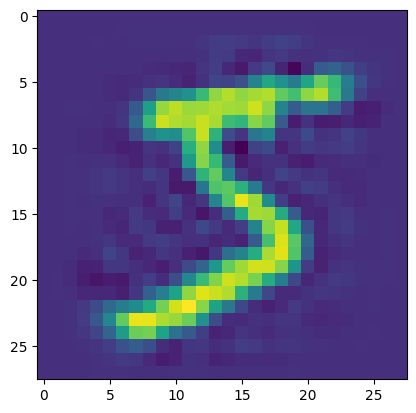

In [5]:
import matplotlib.pyplot as plt

# 154 차원으로 압축
pca = PCA(n_components = 154)
x_reduced = pca.fit_transform(x_train)

# 784차원으로 복원
x_recovered = pca.inverse_transform(x_reduced)
plt.imshow(x_recovered.reshape(60000,28,28)[0])

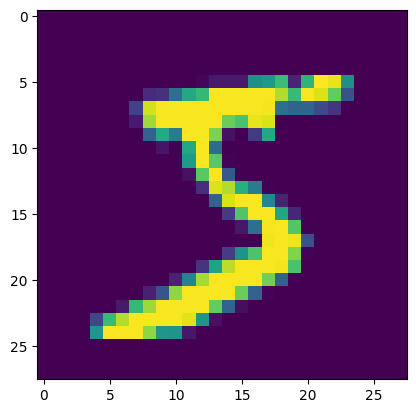

In [7]:
plt.imshow(x_train[0].reshape(28,28))

In [8]:
# 대량의 데이터의 경우 pca를 구현하기 위해 전체 데이터셋을 메모리에 올리는 것이 어려울 수 있음
# 점진적 pca(Incremental PCA) 알고리즘을 사용하여 미치배치 방법으로 pca를 실행할 수 있음

from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

#미니배치에 해당하는 부분만 사용하므로 메모리가 절약됨
for x_batch in np.array_split(x_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(x_batch)

x_reduced = inc_pca.transform(x_train)
x_recovered_inc_pca = inc_pca.inverse_transform(x_reduced)

....................................................................................................

In [9]:
# 일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 비교
# 평균이 같은지 확인
# allclose() 두 배열이 오차범위 내에서 같으면 True, 다르면 False
np.allclose(pca.mean_, inc_pca.mean_)

False

In [10]:
np.mean(pca.mean_), np.mean(inc_pca.mean_)

(0.13066266, 0.1306604774024101)

In [11]:
#랜덤 포레스트 모형

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rnd_clf.fit(x_train, y_train)

#정확도 출력
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9469

In [12]:
# PCA를 사용하여 분산이 95%가 되도록 차원 축소

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train_reduced = pca.fit_transform(x_train)

#랜덤 포레스트 모형에 압축된 데이터 입력
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=0)
rnd_clf2.fit(x_train_reduced, y_train)
#학습 시간: 9.93초(느려짐)
#차원 축소가 반드시 학습 시간 단축을 의미하지는 않음

RandomForestClassifier(n_estimators=10, random_state=0)

In [13]:
# 검증용 데이터셋으로 평가
x_test_reduced = pca.transform(x_test)
y_pred = rnd_clf2.predict(x_test_reduced)
accuracy_score(y_test, y_pred)   # 차원 축소로 인한 정보 손실로 성능이 감소되는 것이 일반적

0.8942

In [15]:
# multinomial: 소프트맥스 방식(다중분류)의 로지스틱 회귀분석
# 메모리는 적게 쓰더라도 시간이 많이 걸림
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=0)
log_clf.fit(x_train, y_train)

y_pred = log_clf.predict(x_test)
accuracy_score(y_test, y_pred)   #92.22%

0.9256

In [16]:
# 주성분분석으로 축소된 데이터셋으로 학습

log_clf2 = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=0)
log_clf2.fit(x_train_reduced, y_train)
y_pred = log_clf2.predict(x_test_reduced)
accuracy_score(y_test, y_pred)
#92.03% , 성능이 약간 감소되었으나 속도가 향상되었음
# 8.62초, 차원 축소 후 시간이 감소함

0.9233